#### IMPORT LIBRARY

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### READ DATASET

In [2]:
dataset_file_name = "Churn_Modelling.csv"
dataset = pd.read_csv(dataset_file_name)
dataset.head(3)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1


#### DEVIDE DATASET INTO INDEPENDENT AND DEPENDENT FEATURE

In [12]:
X = dataset.iloc[:,3:-1]
y = dataset.iloc[:,-1]
display(X.head(3))
display(y.head(1))

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57


0    1
Name: Exited, dtype: int64

#### FEATURING ENGINEERING

In [21]:
categorical_columns = [col for col in X.columns if np.dtype(X[col]) == 'O']
numerical_columns =  [col for col in X.columns if not np.dtype(X[col]) == 'O']
display(categorical_columns)
display(numerical_columns)
geography = pd.get_dummies(X.Geography,drop_first=True)
gender = pd.get_dummies(X.Gender, drop_first=True)

['Geography', 'Gender']

['CreditScore',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary']

In [22]:
# DROP CATEGORICAL FEATURE AND REPLACE FEATURE SCALE GENDER
X = X.drop(["Gender","Geography"], axis=1)

# CONCATE FEATURE SCALE COLUMNS
X = pd.concat([X,geography,gender], axis=1)

#### SPLITTING DATASET INTO TRAIN AND TEST SET

In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

#### FEATURE SCALING

In [26]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
display(X_train)
display(X_test)

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

#### IMPORT LIBRARY FOR ANN-(Artificial Neural Network)

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU, PReLU, ELU, ReLU
from tensorflow.keras.layers import Dropout

##### LETS INITIALIZE THE ANN

In [28]:
# LETS INITIALIZE THE ANN
classifier = Sequential()

#### CREATE LAYER FOR ANN

In [30]:
# ADDING INPUT LAYER AND FIRST HIDDEN LAYER
classifier.add(Dense(10, input_shape=(X_train.shape[1],), activation="relu"))

# ADDING THE SECOND HIDDEN LAYER
classifier.add(Dense(units=10, activation="relu"))
# ADDING THE DROPOUT FOR SECOND HIDDEN LAYER
#classifier.add(Dropout(0.2))

# ADDING THE THIRD HIDDEN LAYER
classifier.add(Dense(units=10, activation="relu"))
# ADDING THE DROPOUT FOR THIRD HIDDEN LAYER
#classifier.add(Dropout(0.2))

# ADDING THE OUTPUT LAYER
classifier.add(Dense(1, activation="sigmoid"))

classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                120       
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 11        
Total params: 351
Trainable params: 351
Non-trainable params: 0
_________________________________________________________________


#### MODEL OPTIMIZER

In [31]:
from tensorflow.keras.optimizers import Adam
adam_optimizer = Adam(learning_rate=0.01)

###### EARLY STOPPING

In [32]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(
    monitor="val_loss",
    patience=6
)

#### MODEL COMPILE

In [34]:
classifier.compile(
    optimizer=adam_optimizer,
    loss='binary_crossentropy',
    metrics=['accuracy']
)

#### MODEL FIT

In [35]:
model_history = classifier.fit(X_train,
                               y_train,
                               validation_data=(X_test,y_test),
                               batch_size=10,
                               epochs=100,
                               callbacks=early_stopping
                               )

Epoch 1/100
800/800 [==============================] - 7s 5ms/step - loss: 0.4170 - accuracy: 0.8127 - val_loss: 0.3711 - val_accuracy: 0.8420
Epoch 2/100
800/800 [==============================] - 3s 4ms/step - loss: 0.3658 - accuracy: 0.8510 - val_loss: 0.3572 - val_accuracy: 0.8615
Epoch 3/100
800/800 [==============================] - 3s 4ms/step - loss: 0.3552 - accuracy: 0.8537 - val_loss: 0.3569 - val_accuracy: 0.8450
Epoch 4/100
800/800 [==============================] - 3s 3ms/step - loss: 0.3512 - accuracy: 0.8570 - val_loss: 0.3453 - val_accuracy: 0.8625
Epoch 5/100
800/800 [==============================] - 3s 3ms/step - loss: 0.3499 - accuracy: 0.8559 - val_loss: 0.3431 - val_accuracy: 0.8605
Epoch 6/100
800/800 [==============================] - 2s 3ms/step - loss: 0.3507 - accuracy: 0.8558 - val_loss: 0.3395 - val_accuracy: 0.8635
Epoch 7/100
800/800 [==============================] - 2s 3ms/step - loss: 0.3484 - accuracy: 0.8574 - val_loss: 0.3409 - val_accuracy: 0.8610

In [36]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

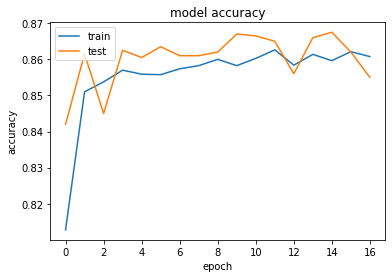

In [37]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

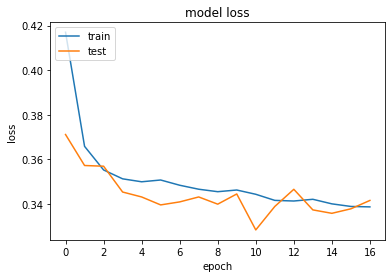

In [38]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#### Making the predictions and evaluating the model

In [39]:
# PREDICTING THE TEST SETB RESULTS
y_pred = classifier.predict(X_test)
y_pred = (y_pred >= 0.5)

In [49]:
y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

#### MAKE THE CONFUSION METRIX

In [41]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1497,  192],
       [  98,  213]], dtype=int64)

#### CALCULATE ACCURACY

In [43]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, y_pred)
score

0.855

#### GET WEIGHTS

In [45]:
model_weights = classifier.get_weights()

#### SAVE MODEL INTO h5 FILE

In [46]:
classifier.save('model_classifier.h5')

#### LOADING MODEL FROM FILE

In [47]:
from tensorflow.keras.models import load_model
classifier_model = load_model('model_classifier.h5')

#### PREDICTION FROM LOADED MODEL

In [48]:
classifier_model.predict(X_test)

array([[0.2548916 ],
       [0.3623681 ],
       [0.12621623],
       ...,
       [0.23196101],
       [0.2548916 ],
       [0.2548916 ]], dtype=float32)